In [1]:
"""
PREDICCIÓN DE PRECIOS DE VIVIENDA
=================================

Objetivos:
- Comprender los conceptos básicos del aprendizaje supervisado (problemas de regresión)
- Resolver problemas de regresión usando scikit-learn
- Comparar diferentes métodos de regresión
- Trabajar con datos reales del mercado inmobiliario

Dataset: Precios de vivienda de Ames, Iowa
Fuente: Kaggle House Prices Competition
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

print("="*80)
print("PREDICCIÓN DE PRECIOS DE VIVIENDA")
print("Aprendizaje Supervisado - Problemas de Regresión")
print("="*80)


PREDICCIÓN DE PRECIOS DE VIVIENDA
Aprendizaje Supervisado - Problemas de Regresión


In [2]:
# ============================================================================
# 1. OBJETIVO Y COMPRENSIÓN DEL PROBLEMA
# ============================================================================

print("📊 1. OBJETIVO Y COMPRENSIÓN DEL PROBLEMA")
print("="*45)

print("""
🎯 OBJETIVOS DE APRENDIZAJE:
────────────────────────────

🔹 APRENDIZAJE SUPERVISADO - REGRESIÓN:
   • Comprender la diferencia entre clasificación y regresión
   • Implementar algoritmos de regresión con scikit-learn
   • Evaluar modelos usando métricas apropiadas para regresión

🔹 TÉCNICAS A IMPLEMENTAR:
   • Regresión Lineal
   • Support Vector Regression (SVR)
   • Árbol de Decisión para Regresión
   • Random Forest para Regresión

🔹 FLUJO DEL PROYECTO:
   • Análisis exploratorio de datos (EDA)
   • Preprocesamiento y limpieza de datos
   • Entrenamiento y evaluación de modelos
   • Comparación de rendimiento
   • Visualización de resultados

📊 DATASET - PRECIOS DE VIVIENDA AMES, IOWA:
   • 79 características de viviendas
   • Variable objetivo: SalePrice (precio de venta)
   • Datos reales del mercado inmobiliario
   • Problema de regresión: predecir valores continuos
""")

print("✅ Objetivos establecidos")


📊 1. OBJETIVO Y COMPRENSIÓN DEL PROBLEMA

🎯 OBJETIVOS DE APRENDIZAJE:
────────────────────────────

🔹 APRENDIZAJE SUPERVISADO - REGRESIÓN:
   • Comprender la diferencia entre clasificación y regresión
   • Implementar algoritmos de regresión con scikit-learn
   • Evaluar modelos usando métricas apropiadas para regresión

🔹 TÉCNICAS A IMPLEMENTAR:
   • Regresión Lineal
   • Support Vector Regression (SVR)
   • Árbol de Decisión para Regresión
   • Random Forest para Regresión

🔹 FLUJO DEL PROYECTO:
   • Análisis exploratorio de datos (EDA)
   • Preprocesamiento y limpieza de datos
   • Entrenamiento y evaluación de modelos
   • Comparación de rendimiento
   • Visualización de resultados

📊 DATASET - PRECIOS DE VIVIENDA AMES, IOWA:
   • 79 características de viviendas
   • Variable objetivo: SalePrice (precio de venta)
   • Datos reales del mercado inmobiliario
   • Problema de regresión: predecir valores continuos

✅ Objetivos establecidos


In [3]:
# ============================================================================
# 2. CARGA Y EXPLORACIÓN INICIAL DEL DATASET
# ============================================================================

print("\n🏠 2. CARGA Y EXPLORACIÓN DEL DATASET")
print("="*45)

# Cargar el dataset
try:
    df = pd.read_csv('train.csv')
    print("✅ Dataset cargado exitosamente")
    print(f"   Forma del dataset: {df.shape}")
except FileNotFoundError:
    print("❌ Error: No se encontró train.csv")
    print("   Asegúrate de que el archivo esté en el mismo directorio que este notebook")
    exit()

print(f"\n📊 INFORMACIÓN BÁSICA DEL DATASET:")
print(f"   • Número de viviendas: {df.shape[0]:,}")
print(f"   • Número de características: {df.shape[1]:,}")
print(f"   • Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Información sobre la variable objetivo
target_variable = 'SalePrice'
if target_variable in df.columns:
    print(f"\n💰 VARIABLE OBJETIVO - {target_variable}:")
    print(f"   • Precio promedio: ${df[target_variable].mean():,.0f}")
    print(f"   • Precio mediano: ${df[target_variable].median():,.0f}")
    print(f"   • Precio mínimo: ${df[target_variable].min():,.0f}")
    print(f"   • Precio máximo: ${df[target_variable].max():,.0f}")
    print(f"   • Desviación estándar: ${df[target_variable].std():,.0f}")
else:
    print(f"❌ No se encontró la variable objetivo '{target_variable}'")
    print(f"   Columnas disponibles: {list(df.columns)}")

# Mostrar primeras filas
print(f"\n📋 Primeras 5 filas del dataset:")
display(df.head())

# Información general del dataset
print(f"\n📈 Información general del dataset:")
print(df.info())

print("✅ Exploración inicial completada")



🏠 2. CARGA Y EXPLORACIÓN DEL DATASET
✅ Dataset cargado exitosamente
   Forma del dataset: (1460, 81)

📊 INFORMACIÓN BÁSICA DEL DATASET:
   • Número de viviendas: 1,460
   • Número de características: 81
   • Memoria utilizada: 3.9 MB

💰 VARIABLE OBJETIVO - SalePrice:
   • Precio promedio: $180,921
   • Precio mediano: $163,000
   • Precio mínimo: $34,900
   • Precio máximo: $755,000
   • Desviación estándar: $79,443

📋 Primeras 5 filas del dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



📈 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1


🔍 3. ANÁLISIS EXPLORATORIO DE DATOS
📊 Estadísticas descriptivas de la variable objetivo:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

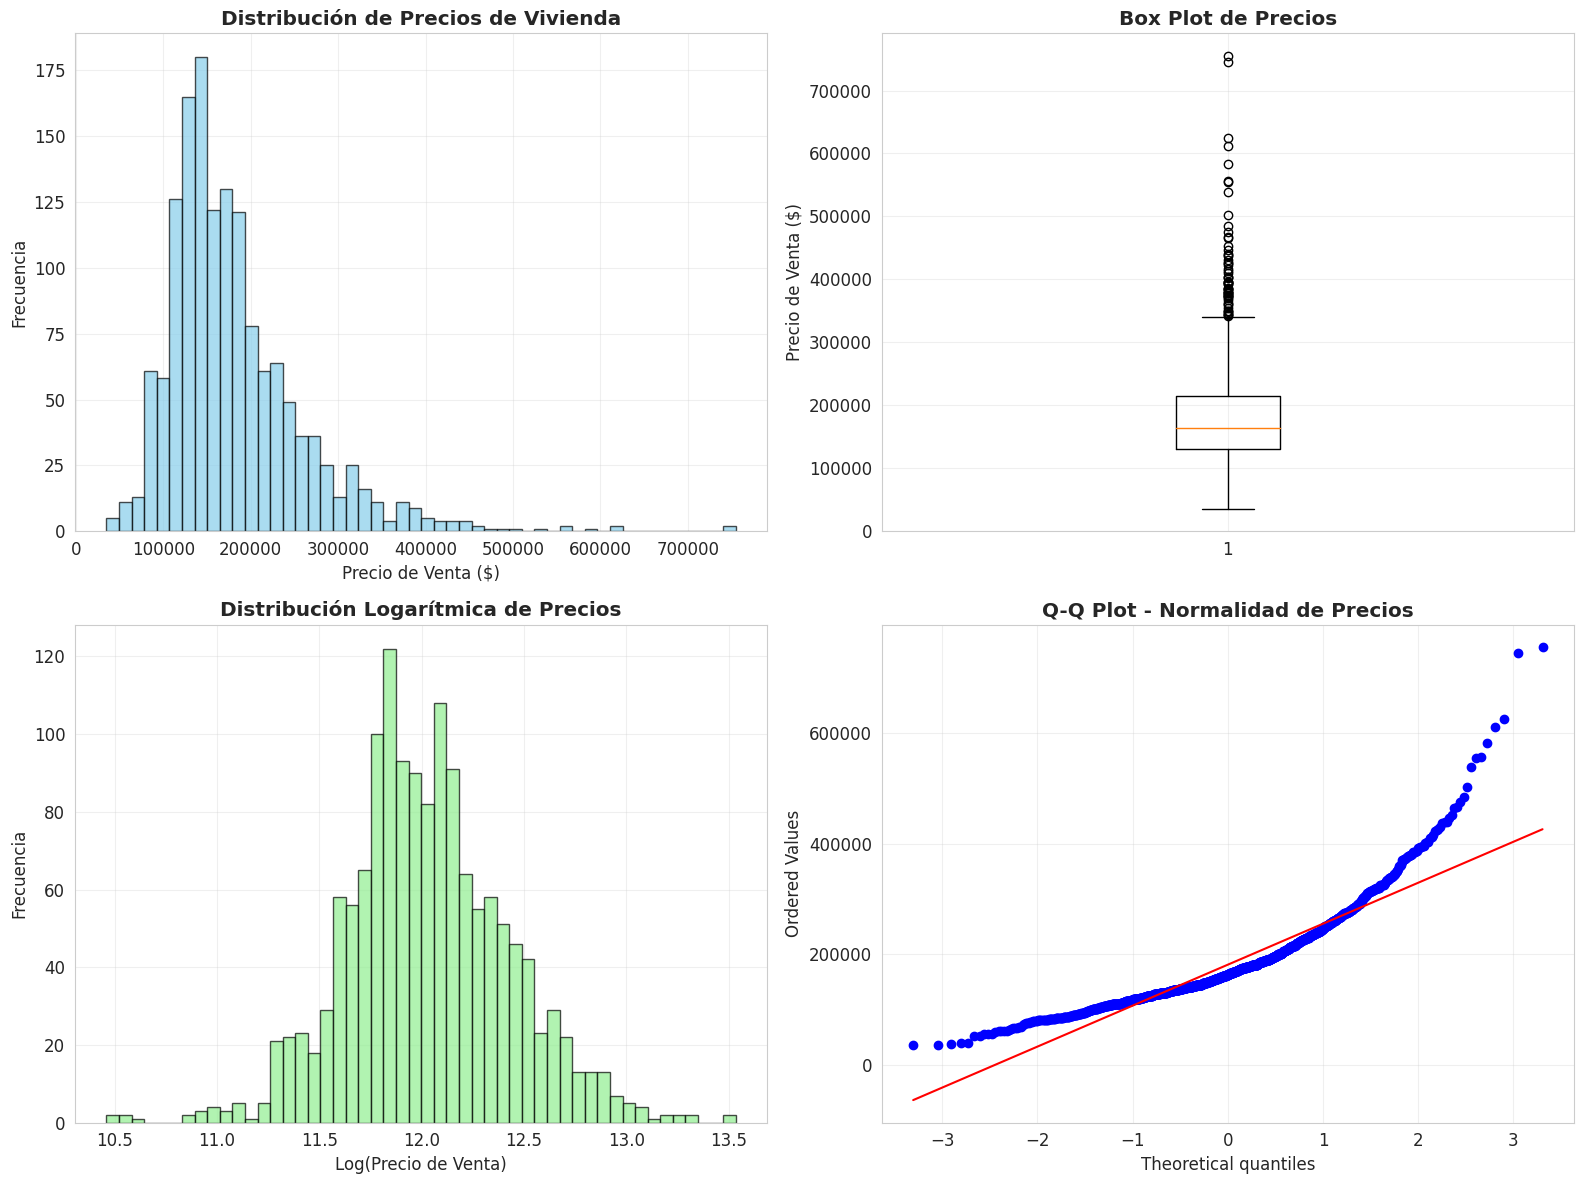


🕳️ Análisis de valores faltantes:
📊 Top 10 características con valores faltantes:


,Característica,Valores_Faltantes,Porcentaje(%)
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,MasVnrType,872,59.726027
5,FireplaceQu,690,47.260274
6,LotFrontage,259,17.739726
7,GarageYrBlt,81,5.547945
8,GarageCond,81,5.547945
9,GarageType,81,5.547945


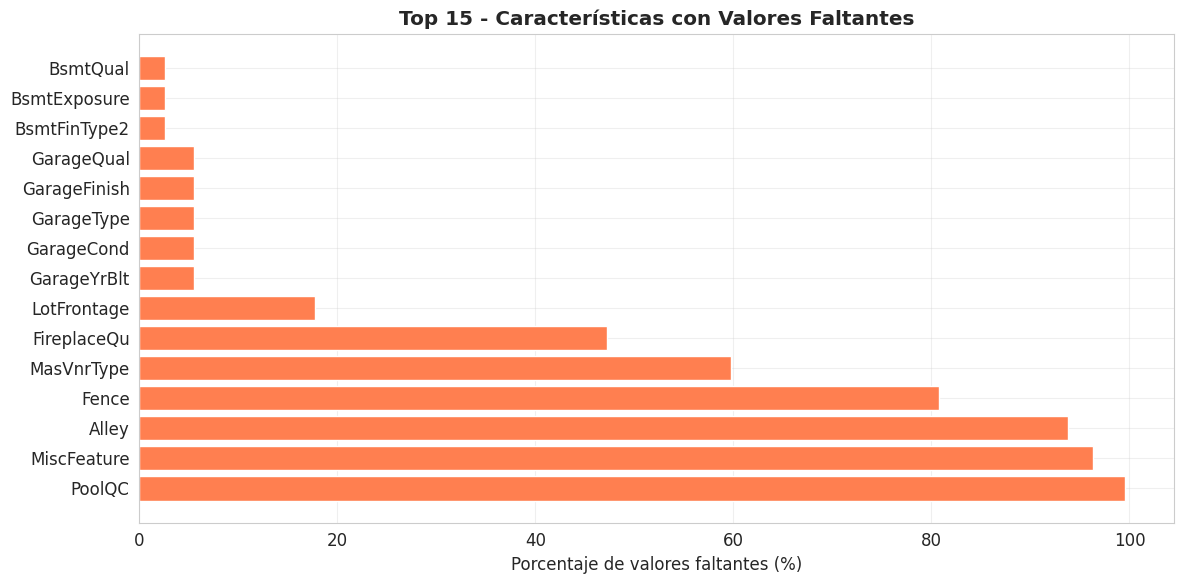


📋 Tipos de datos:
   • Características numéricas: 38
   • Características categóricas: 43
✅ Análisis exploratorio completado


In [4]:
# ============================================================================
# 3. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ============================================================================

print("\n🔍 3. ANÁLISIS EXPLORATORIO DE DATOS")
print("="*40)

# Estadísticas descriptivas
print("📊 Estadísticas descriptivas de la variable objetivo:")
display(df[target_variable].describe())

# Distribución de precios
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de precios
axes[0,0].hist(df[target_variable], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Precio de Venta ($)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_title('Distribución de Precios de Vivienda', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Box plot de precios
axes[0,1].boxplot(df[target_variable])
axes[0,1].set_ylabel('Precio de Venta ($)')
axes[0,1].set_title('Box Plot de Precios', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Histograma con transformación logarítmica
log_prices = np.log(df[target_variable])
axes[1,0].hist(log_prices, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_xlabel('Log(Precio de Venta)')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución Logarítmica de Precios', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Q-Q plot para normalidad
from scipy import stats
stats.probplot(df[target_variable], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot - Normalidad de Precios', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de valores faltantes
print(f"\n🕳️ Análisis de valores faltantes:")
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

if len(missing_data) > 0:
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Característica': missing_data.index,
        'Valores_Faltantes': missing_data.values,
        'Porcentaje(%)': missing_percent.values
    })
    
    print(f"📊 Top 10 características con valores faltantes:")
    display(missing_df.head(10))
    
    # Visualización de valores faltantes
    plt.figure(figsize=(12, 6))
    top_missing = missing_percent.head(15)
    plt.barh(range(len(top_missing)), top_missing.values, color='coral')
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Porcentaje de valores faltantes (%)')
    plt.title('Top 15 - Características con Valores Faltantes', fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No se encontraron valores faltantes")

# Tipos de datos
print(f"\n📋 Tipos de datos:")
numeric_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=['object']).columns

print(f"   • Características numéricas: {len(numeric_features)}")
print(f"   • Características categóricas: {len(categorical_features)}")

print("✅ Análisis exploratorio completado")



⚙️ 4. PREPARACIÓN INICIAL - MODELO SIMPLE
🎯 ENFOQUE INICIAL:
   Comenzaremos con un modelo simple usando solo 2 características:
   • GrLivArea: Superficie habitable en planta baja
   • YearBuilt: Año de construcción

📊 DATASET SIMPLE PREPARADO:
   • Características seleccionadas: ['GrLivArea', 'YearBuilt']
   • Forma de X: (1460, 2)
   • Forma de y: (1460,)

🔍 Verificación de valores faltantes en características seleccionadas:
   • GrLivArea: 0 faltantes (0.0%)
   • YearBuilt: 0 faltantes (0.0%)

📈 Estadísticas de características seleccionadas:


,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


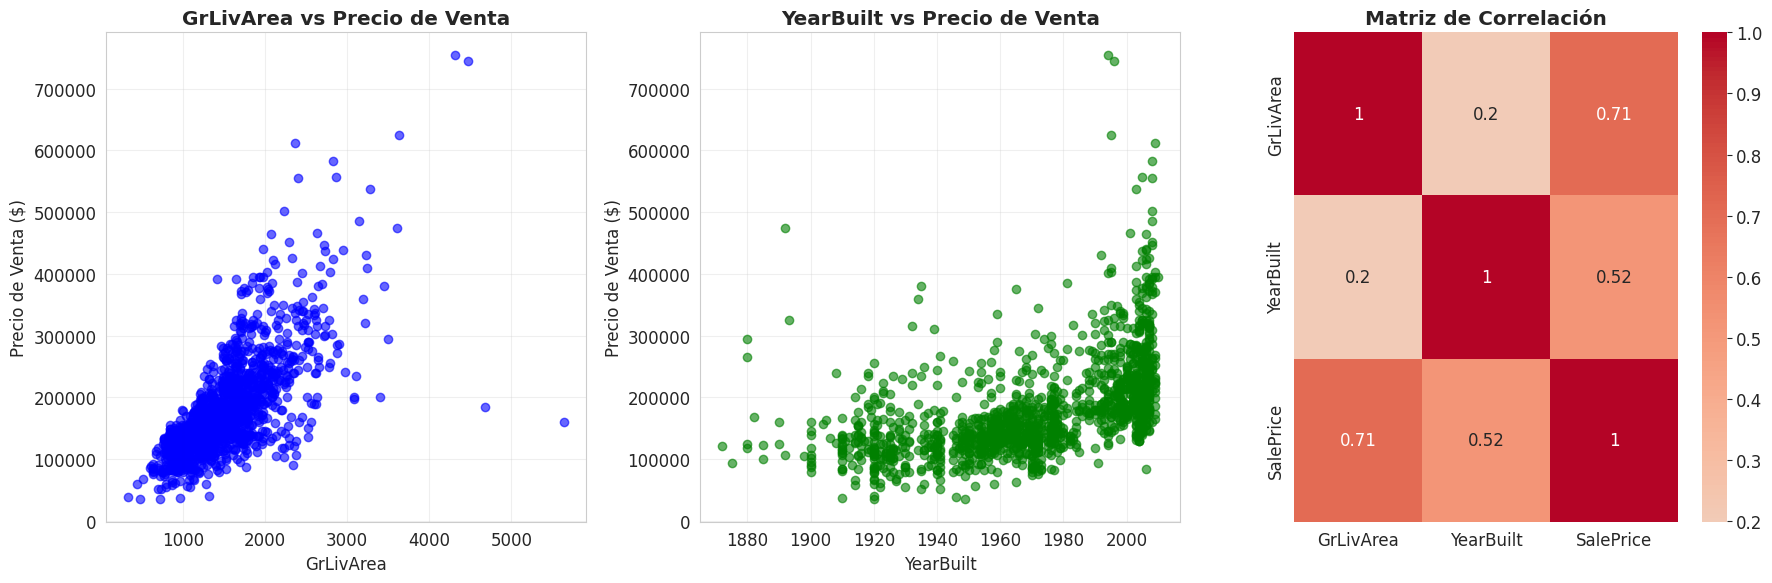


🔗 Correlaciones con el precio de venta:
   • GrLivArea: 0.709
   • YearBuilt: 0.523
✅ Preparación del modelo simple completada


In [5]:
# ============================================================================
# 4. PREPARACIÓN INICIAL - MODELO SIMPLE CON 2 CARACTERÍSTICAS
# ============================================================================

print("\n⚙️ 4. PREPARACIÓN INICIAL - MODELO SIMPLE")
print("="*45)

print("🎯 ENFOQUE INICIAL:")
print("   Comenzaremos con un modelo simple usando solo 2 características:")
print("   • GrLivArea: Superficie habitable en planta baja")
print("   • YearBuilt: Año de construcción")

# Verificar que las características existen
required_features = ['GrLivArea', 'YearBuilt']
missing_features = [f for f in required_features if f not in df.columns]

if missing_features:
    print(f"❌ Características faltantes: {missing_features}")
    print(f"   Características disponibles que podrían ser similares:")
    similar_features = [col for col in df.columns if any(keyword in col.lower() 
                       for keyword in ['area', 'year', 'built', 'size'])]
    print(f"   {similar_features[:10]}")
    
    # Usar características alternativas si las originales no existen
    if 'GrLivArea' not in df.columns:
        area_features = [col for col in df.columns if 'area' in col.lower()]
        if area_features:
            required_features[0] = area_features[0]
            print(f"   Usando {area_features[0]} en lugar de GrLivArea")
    
    if 'YearBuilt' not in df.columns:
        year_features = [col for col in df.columns if 'year' in col.lower()]
        if year_features:
            required_features[1] = year_features[0]
            print(f"   Usando {year_features[0]} en lugar de YearBuilt")

# Crear dataset simple
features_simple = required_features
X_simple = df[features_simple].copy()
y = df[target_variable].copy()

print(f"\n📊 DATASET SIMPLE PREPARADO:")
print(f"   • Características seleccionadas: {features_simple}")
print(f"   • Forma de X: {X_simple.shape}")
print(f"   • Forma de y: {y.shape}")

# Verificar valores faltantes en características seleccionadas
print(f"\n🔍 Verificación de valores faltantes en características seleccionadas:")
for feature in features_simple:
    missing_count = X_simple[feature].isnull().sum()
    missing_pct = (missing_count / len(X_simple)) * 100
    print(f"   • {feature}: {missing_count} faltantes ({missing_pct:.1f}%)")

# Limpiar valores faltantes si los hay
if X_simple.isnull().any().any():
    print("🧹 Limpiando valores faltantes...")
    # Eliminar filas con valores faltantes en características seleccionadas
    mask = X_simple.isnull().any(axis=1)
    X_simple = X_simple[~mask]
    y = y[~mask]
    print(f"   • Filas eliminadas: {mask.sum()}")
    print(f"   • Nuevo tamaño del dataset: {X_simple.shape[0]}")

# Estadísticas descriptivas de características seleccionadas
print(f"\n📈 Estadísticas de características seleccionadas:")
display(X_simple.describe())

# Visualización de relaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Relación GrLivArea vs SalePrice
axes[0].scatter(X_simple[features_simple[0]], y, alpha=0.6, color='blue')
axes[0].set_xlabel(features_simple[0])
axes[0].set_ylabel('Precio de Venta ($)')
axes[0].set_title(f'{features_simple[0]} vs Precio de Venta', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Relación YearBuilt vs SalePrice
axes[1].scatter(X_simple[features_simple[1]], y, alpha=0.6, color='green')
axes[1].set_xlabel(features_simple[1])
axes[1].set_ylabel('Precio de Venta ($)')
axes[1].set_title(f'{features_simple[1]} vs Precio de Venta', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Matriz de correlación
corr_matrix = X_simple.assign(SalePrice=y).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[2])
axes[2].set_title('Matriz de Correlación', fontweight='bold')

plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
correlations = X_simple.corrwith(y).sort_values(ascending=False)
print(f"\n🔗 Correlaciones con el precio de venta:")
for feature, corr in correlations.items():
    print(f"   • {feature}: {corr:.3f}")

print("✅ Preparación del modelo simple completada")



🔄 5. DIVISIÓN DE DATOS Y PREPROCESAMIENTO
📊 DIVISIÓN DE DATOS:
   • Datos de entrenamiento: 1168 muestras
   • Datos de prueba: 292 muestras
   • Proporción: 80% entrenamiento, 20% prueba

📈 Estadísticas de precios por conjunto:
   ENTRENAMIENTO:
   • Precio promedio: $181,442
   • Precio mediano: $165,000
   • Desviación estándar: $77,264
   PRUEBA:
   • Precio promedio: $178,840
   • Precio mediano: $154,150
   • Desviación estándar: $87,731

⚖️ ESTANDARIZACIÓN DE CARACTERÍSTICAS:
   • Aplicando StandardScaler a las características
   • Importante: Ajustar solo con datos de entrenamiento

📊 Estadísticas antes y después de estandarización:
ANTES (datos de entrenamiento):
         GrLivArea    YearBuilt
count  1168.000000  1168.000000
mean   1527.401541  1970.965753
std     524.432686    30.675495
min     334.000000  1872.000000
25%    1145.750000  1953.000000
50%    1473.000000  1972.000000
75%    1792.000000  2001.000000
max    5642.000000  2010.000000

DESPUÉS (datos de entrenamien

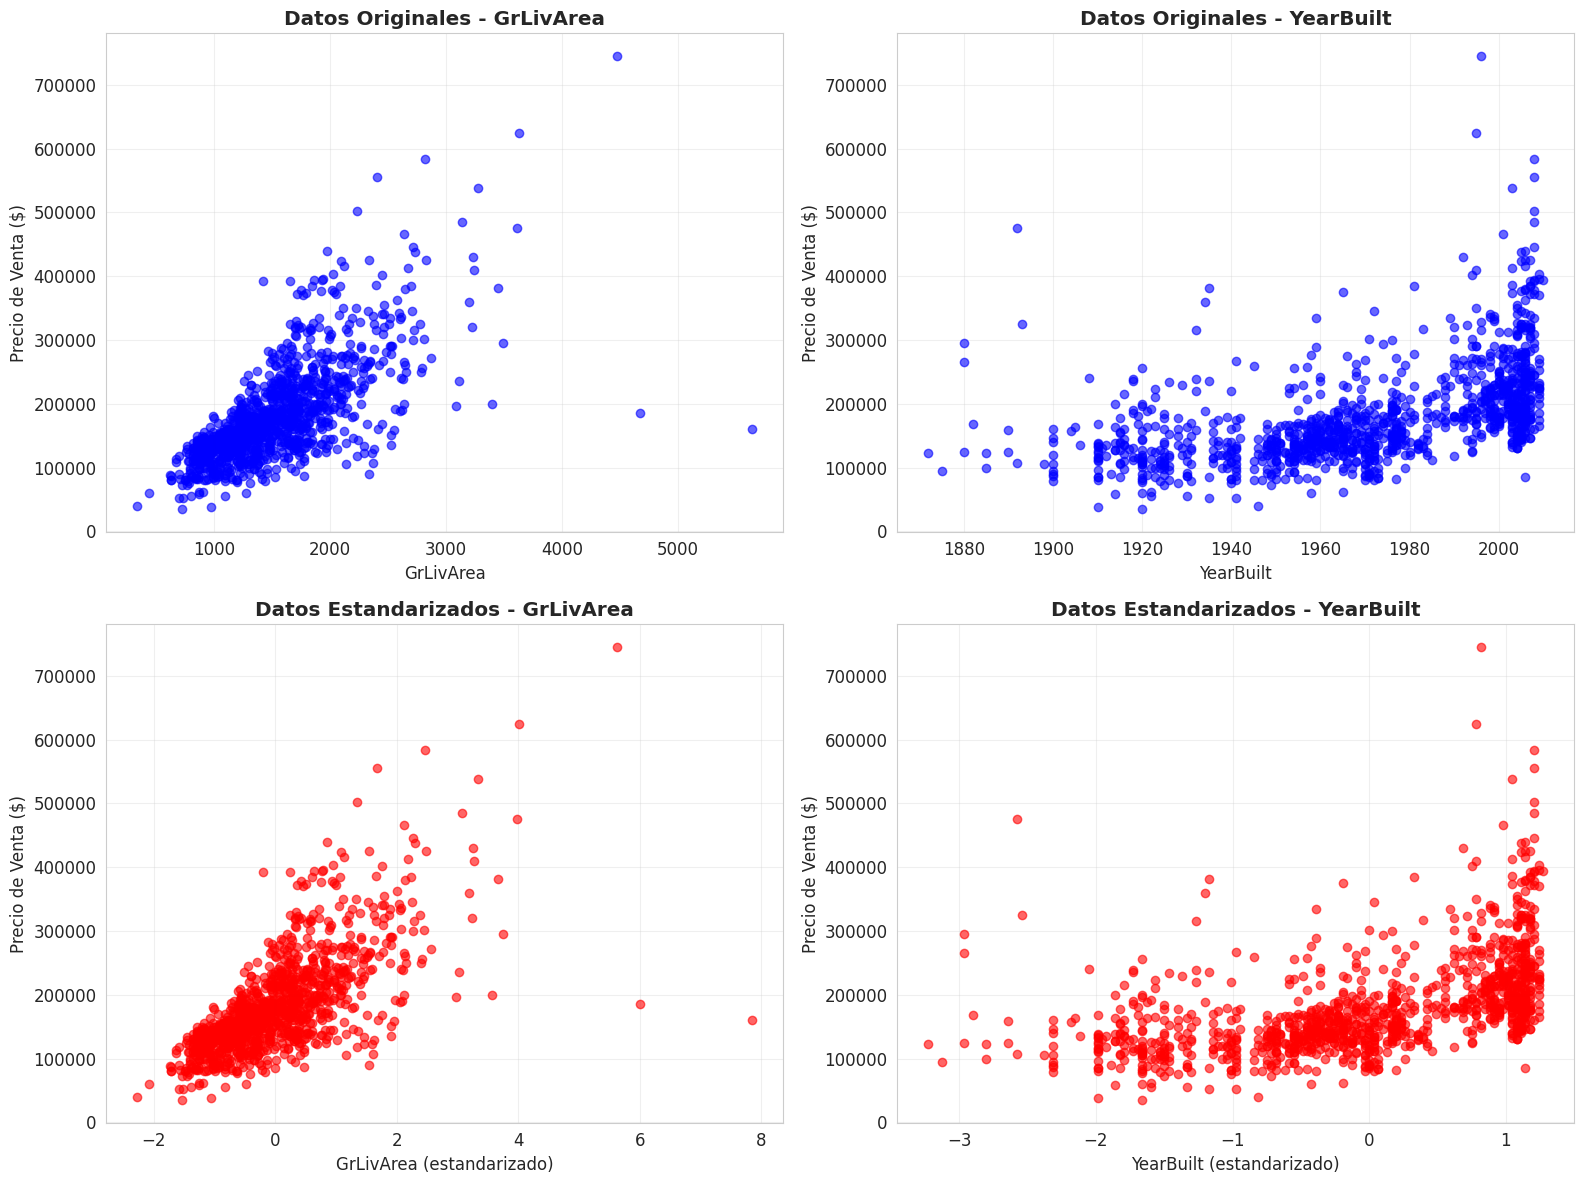

✅ División y preprocesamiento completados


In [6]:
# ============================================================================
# 5. DIVISIÓN DE DATOS Y PREPROCESAMIENTO
# ============================================================================

print("\n🔄 5. DIVISIÓN DE DATOS Y PREPROCESAMIENTO")
print("="*48)

# División de datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, 
    test_size=0.2, 
    random_state=42
)

print("📊 DIVISIÓN DE DATOS:")
print(f"   • Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"   • Datos de prueba: {X_test.shape[0]} muestras")
print(f"   • Proporción: 80% entrenamiento, 20% prueba")

# Estadísticas de los conjuntos
print(f"\n📈 Estadísticas de precios por conjunto:")
print(f"   ENTRENAMIENTO:")
print(f"   • Precio promedio: ${y_train.mean():,.0f}")
print(f"   • Precio mediano: ${y_train.median():,.0f}")
print(f"   • Desviación estándar: ${y_train.std():,.0f}")

print(f"   PRUEBA:")
print(f"   • Precio promedio: ${y_test.mean():,.0f}")
print(f"   • Precio mediano: ${y_test.median():,.0f}")
print(f"   • Desviación estándar: ${y_test.std():,.0f}")

# Estandarización de características
print(f"\n⚖️ ESTANDARIZACIÓN DE CARACTERÍSTICAS:")
print("   • Aplicando StandardScaler a las características")
print("   • Importante: Ajustar solo con datos de entrenamiento")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame para facilitar el manejo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_simple, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_simple, index=X_test.index)

print(f"\n📊 Estadísticas antes y después de estandarización:")
print("ANTES (datos de entrenamiento):")
print(X_train.describe())

print("\nDESPUÉS (datos de entrenamiento estandarizados):")
print(X_train_scaled.describe())

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Datos originales
for i, feature in enumerate(features_simple):
    ax = axes[0, i]
    ax.scatter(X_train[feature], y_train, alpha=0.6, color='blue')
    ax.set_xlabel(feature)
    ax.set_ylabel('Precio de Venta ($)')
    ax.set_title(f'Datos Originales - {feature}', fontweight='bold')
    ax.grid(True, alpha=0.3)

# Datos estandarizados
for i, feature in enumerate(features_simple):
    ax = axes[1, i]
    ax.scatter(X_train_scaled[feature], y_train, alpha=0.6, color='red')
    ax.set_xlabel(f'{feature} (estandarizado)')
    ax.set_ylabel('Precio de Venta ($)')
    ax.set_title(f'Datos Estandarizados - {feature}', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ División y preprocesamiento completados")



📈 6. REGRESIÓN LINEAL SIMPLE
📚 ACERCA DE REGRESIÓN LINEAL:

🔹 PRINCIPIO:
   • Encuentra la mejor línea recta que se ajusta a los datos
   • Minimiza la suma de errores cuadráticos (método de mínimos cuadrados)
   • Asume relación lineal entre características y variable objetivo

🔹 VENTAJAS:
   • Simple e interpretable
   • Rápido de entrenar y predecir
   • No requiere ajuste de hiperparámetros
   • Proporciona coeficientes interpretables

🔹 DESVENTAJAS:
   • Asume linealidad (puede ser limitante)
   • Sensible a outliers
   • Puede sufrir de overfitting con muchas características


📊 RESULTADOS DE REGRESIÓN LINEAL:
   ENTRENAMIENTO:
   • MSE: 2,107,671,093
   • RMSE: $45,909
   • MAE: $30,240
   • R²: 0.6466
   PRUEBA:
   • MSE: 2,495,554,899
   • RMSE: $49,956
   • MAE: $32,359
   • R²: 0.6746

🔢 COEFICIENTES DEL MODELO:
   • Intercepto: $181,442
   • GrLivArea: 48,312.58
   • YearBuilt: 31,618.75

💡 INTERPRETACIÓN:
   • Por cada unidad estándar que aumenta GrLivArea, el precio aume

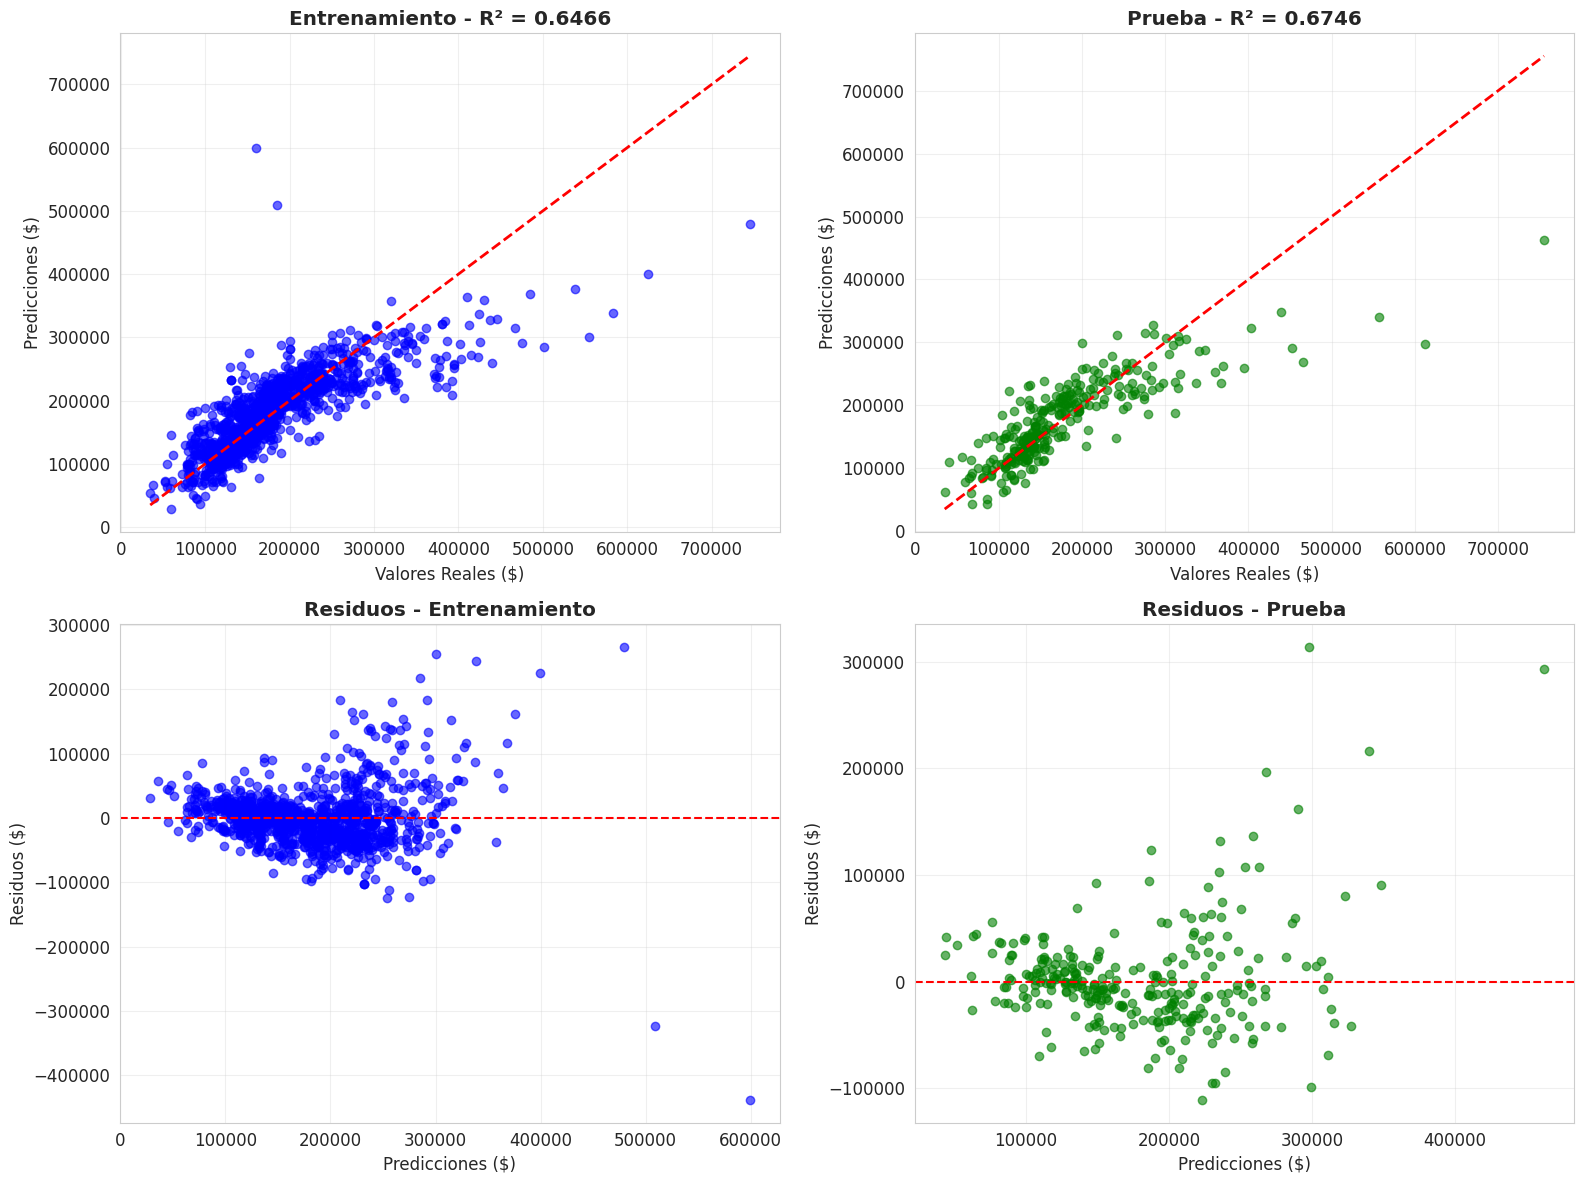


🔍 ANÁLISIS DE RESIDUOS:
   • Media de residuos (entrenamiento): $-0
   • Desviación estándar de residuos (entrenamiento): $45,929
   • Media de residuos (prueba): $1,342
   • Desviación estándar de residuos (prueba): $50,023
✅ Análisis de regresión lineal completado


In [7]:
# ============================================================================
# 6. REGRESIÓN LINEAL SIMPLE
# ============================================================================

print("\n📈 6. REGRESIÓN LINEAL SIMPLE")
print("="*35)

print("📚 ACERCA DE REGRESIÓN LINEAL:")
print("""
🔹 PRINCIPIO:
   • Encuentra la mejor línea recta que se ajusta a los datos
   • Minimiza la suma de errores cuadráticos (método de mínimos cuadrados)
   • Asume relación lineal entre características y variable objetivo

🔹 VENTAJAS:
   • Simple e interpretable
   • Rápido de entrenar y predecir
   • No requiere ajuste de hiperparámetros
   • Proporciona coeficientes interpretables

🔹 DESVENTAJAS:
   • Asume linealidad (puede ser limitante)
   • Sensible a outliers
   • Puede sufrir de overfitting con muchas características
""")

# Entrenar modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Métricas de evaluación
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print(f"\n📊 RESULTADOS DE REGRESIÓN LINEAL:")
print(f"   ENTRENAMIENTO:")
print(f"   • MSE: {mse_train_lr:,.0f}")
print(f"   • RMSE: ${rmse_train_lr:,.0f}")
print(f"   • MAE: ${mae_train_lr:,.0f}")
print(f"   • R²: {r2_train_lr:.4f}")

print(f"   PRUEBA:")
print(f"   • MSE: {mse_test_lr:,.0f}")
print(f"   • RMSE: ${rmse_test_lr:,.0f}")
print(f"   • MAE: ${mae_test_lr:,.0f}")
print(f"   • R²: {r2_test_lr:.4f}")

# Coeficientes del modelo
print(f"\n🔢 COEFICIENTES DEL MODELO:")
print(f"   • Intercepto: ${lr_model.intercept_:,.0f}")
for i, feature in enumerate(features_simple):
    coef = lr_model.coef_[i]
    print(f"   • {feature}: {coef:,.2f}")

# Interpretación de coeficientes
print(f"\n💡 INTERPRETACIÓN:")
for i, feature in enumerate(features_simple):
    coef = lr_model.coef_[i]
    if coef > 0:
        direction = "aumenta"
    else:
        direction = "disminuye"
    print(f"   • Por cada unidad estándar que {direction} {feature}, el precio {direction} en ${abs(coef):,.0f}")

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Predicciones vs Valores Reales (Entrenamiento)
axes[0,0].scatter(y_train, y_pred_train_lr, alpha=0.6, color='blue')
axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Valores Reales ($)')
axes[0,0].set_ylabel('Predicciones ($)')
axes[0,0].set_title(f'Entrenamiento - R² = {r2_train_lr:.4f}', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Predicciones vs Valores Reales (Prueba)
axes[0,1].scatter(y_test, y_pred_test_lr, alpha=0.6, color='green')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Valores Reales ($)')
axes[0,1].set_ylabel('Predicciones ($)')
axes[0,1].set_title(f'Prueba - R² = {r2_test_lr:.4f}', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Residuos (Entrenamiento)
residuals_train = y_train - y_pred_train_lr
axes[1,0].scatter(y_pred_train_lr, residuals_train, alpha=0.6, color='blue')
axes[1,0].axhline(y=0, color='red', linestyle='--')
axes[1,0].set_xlabel('Predicciones ($)')
axes[1,0].set_ylabel('Residuos ($)')
axes[1,0].set_title('Residuos - Entrenamiento', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Residuos (Prueba)
residuals_test = y_test - y_pred_test_lr
axes[1,1].scatter(y_pred_test_lr, residuals_test, alpha=0.6, color='green')
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_xlabel('Predicciones ($)')
axes[1,1].set_ylabel('Residuos ($)')
axes[1,1].set_title('Residuos - Prueba', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de residuos
print(f"\n🔍 ANÁLISIS DE RESIDUOS:")
print(f"   • Media de residuos (entrenamiento): ${residuals_train.mean():,.0f}")
print(f"   • Desviación estándar de residuos (entrenamiento): ${residuals_train.std():,.0f}")
print(f"   • Media de residuos (prueba): ${residuals_test.mean():,.0f}")
print(f"   • Desviación estándar de residuos (prueba): ${residuals_test.std():,.0f}")

print("✅ Análisis de regresión lineal completado")



⚔️ 7. SUPPORT VECTOR REGRESSION (SVR)
📚 ACERCA DE SUPPORT VECTOR REGRESSION:

🔹 PRINCIPIO:
   • Extensión de SVM para problemas de regresión
   • Busca encontrar una función que se desvíe como máximo ε de los valores objetivo
   • Usa vectores de soporte para definir el modelo

🔹 VENTAJAS:
   • Efectivo en espacios de alta dimensión
   • Robusto contra overfitting
   • Versátil con diferentes kernels (linear, rbf, poly)
   • Funciona bien con datos no lineales

🔹 DESVENTAJAS:
   • Sensible a la escala de características
   • Puede ser lento en datasets grandes
   • Menos interpretable que regresión lineal
   • Requiere ajuste de hiperparámetros


🧪 PROBANDO DIFERENTES KERNELS:
   Entrenando SVR con kernel linear...
     • RMSE (prueba): $87,894
     • R² (prueba): -0.0072
     • Vectores de soporte: 1168
   Entrenando SVR con kernel rbf...
     • RMSE (prueba): $88,555
     • R² (prueba): -0.0224
     • Vectores de soporte: 1168
   Entrenando SVR con kernel poly...
     • RMSE (prueba

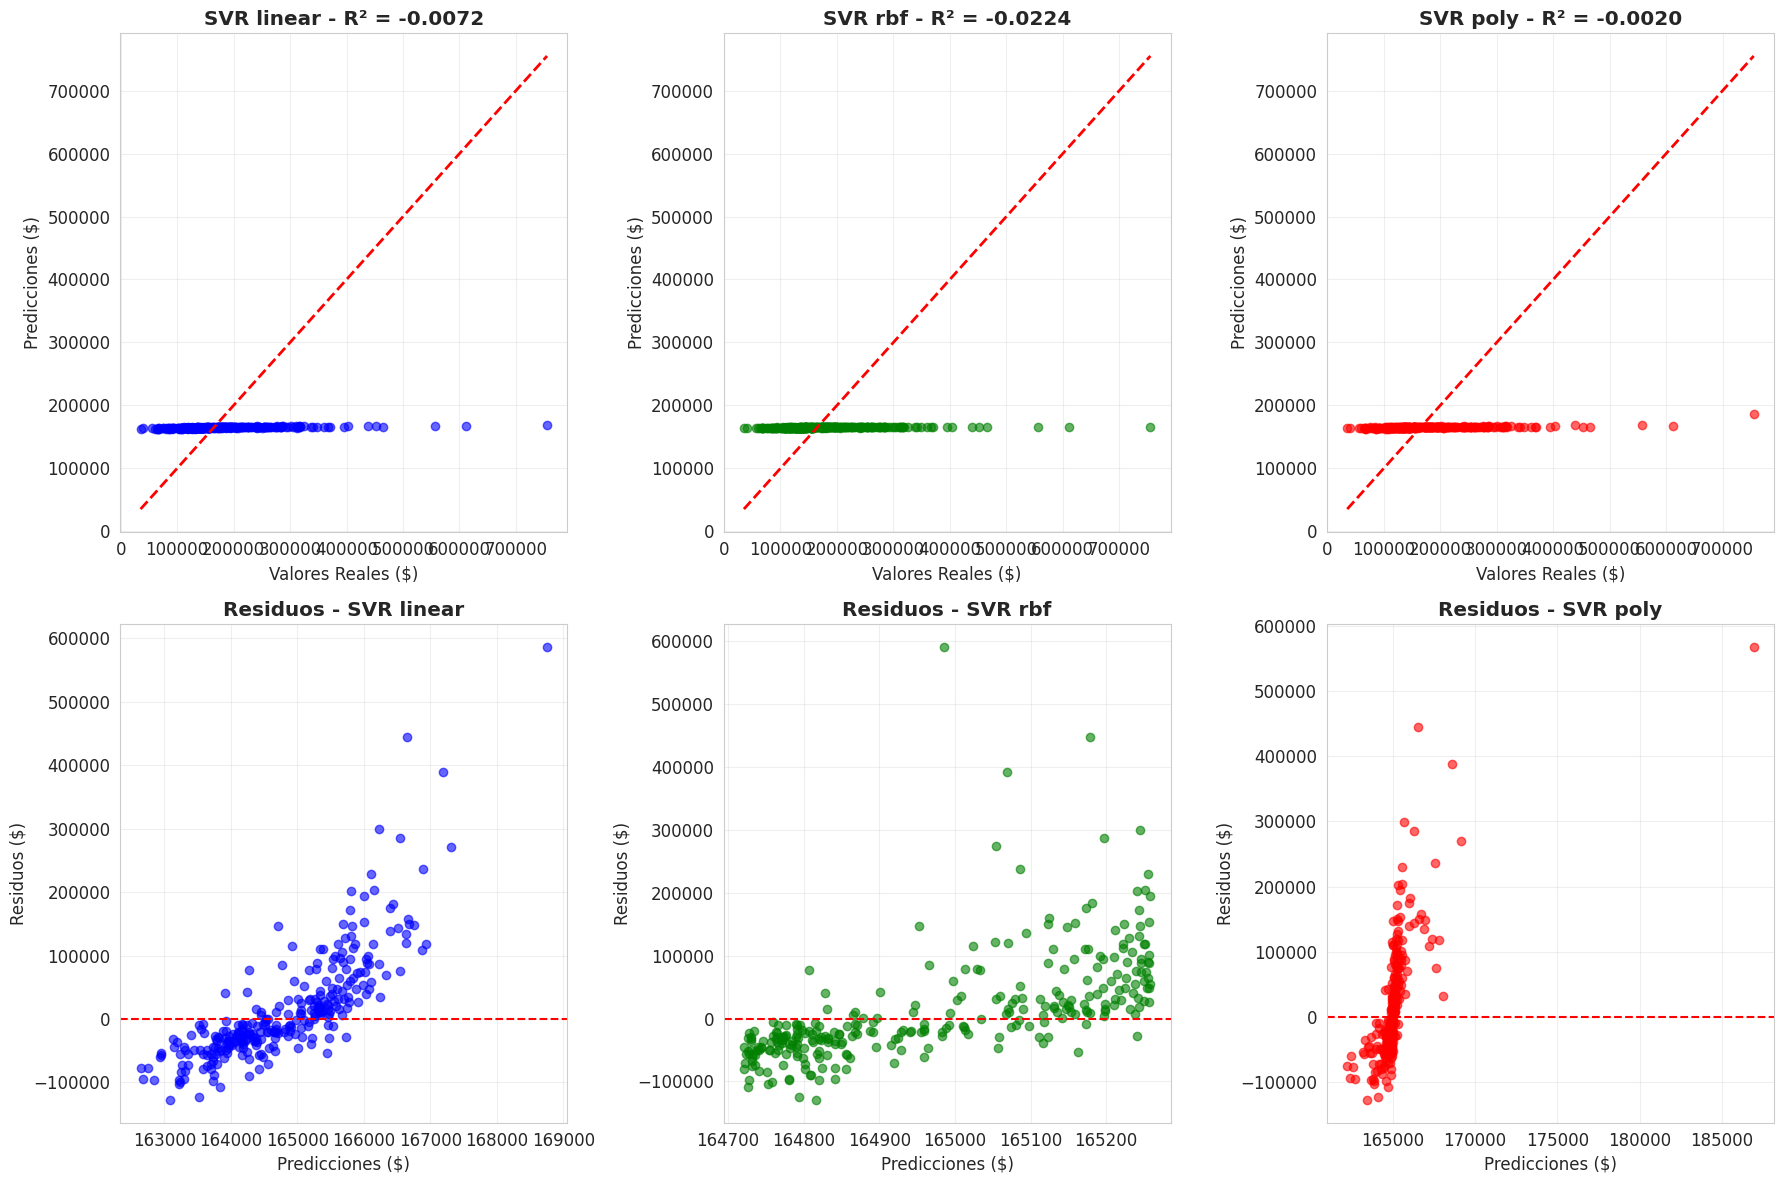


📊 COMPARACIÓN DE KERNELS:
Kernel     RMSE Train   RMSE Test    R² Train   R² Test    Supp Vec  
-----------------------------------------------------------------
linear     $78,240      $87,894      -0.0263    -0.0072    1168      
rbf        $78,846      $88,555      -0.0423    -0.0224    1168      
poly       $78,219      $87,666      -0.0258    -0.0020    1168      
✅ Análisis de SVR completado


In [8]:
# ============================================================================
# 7. SUPPORT VECTOR REGRESSION (SVR)
# ============================================================================

print("\n⚔️ 7. SUPPORT VECTOR REGRESSION (SVR)")
print("="*45)

print("📚 ACERCA DE SUPPORT VECTOR REGRESSION:")
print("""
🔹 PRINCIPIO:
   • Extensión de SVM para problemas de regresión
   • Busca encontrar una función que se desvíe como máximo ε de los valores objetivo
   • Usa vectores de soporte para definir el modelo

🔹 VENTAJAS:
   • Efectivo en espacios de alta dimensión
   • Robusto contra overfitting
   • Versátil con diferentes kernels (linear, rbf, poly)
   • Funciona bien con datos no lineales

🔹 DESVENTAJAS:
   • Sensible a la escala de características
   • Puede ser lento en datasets grandes
   • Menos interpretable que regresión lineal
   • Requiere ajuste de hiperparámetros
""")

# Probar diferentes kernels
kernels = ['linear', 'rbf', 'poly']
svr_results = {}

print(f"\n🧪 PROBANDO DIFERENTES KERNELS:")

for kernel in kernels:
    print(f"   Entrenando SVR con kernel {kernel}...")
    
    # Entrenar modelo
    if kernel == 'poly':
        svr_model = SVR(kernel=kernel, degree=3, C=1.0, epsilon=0.1)
    else:
        svr_model = SVR(kernel=kernel, C=1.0, epsilon=0.1)
    
    svr_model.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred_train = svr_model.predict(X_train_scaled)
    y_pred_test = svr_model.predict(X_test_scaled)
    
    # Métricas
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    svr_results[kernel] = {
        'model': svr_model,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'n_support_vectors': len(svr_model.support_)
    }
    
    print(f"     • RMSE (prueba): ${rmse_test:,.0f}")
    print(f"     • R² (prueba): {r2_test:.4f}")
    print(f"     • Vectores de soporte: {len(svr_model.support_)}")

# Seleccionar mejor kernel
best_kernel = max(svr_results.keys(), key=lambda k: svr_results[k]['r2_test'])
best_svr = svr_results[best_kernel]

print(f"\n🏆 MEJOR RESULTADO: kernel = {best_kernel}")
print(f"   ENTRENAMIENTO:")
print(f"   • MSE: {best_svr['mse_train']:,.0f}")
print(f"   • RMSE: ${best_svr['rmse_train']:,.0f}")
print(f"   • MAE: ${best_svr['mae_train']:,.0f}")
print(f"   • R²: {best_svr['r2_train']:.4f}")

print(f"   PRUEBA:")
print(f"   • MSE: {best_svr['mse_test']:,.0f}")
print(f"   • RMSE: ${best_svr['rmse_test']:,.0f}")
print(f"   • MAE: ${best_svr['mae_test']:,.0f}")
print(f"   • R²: {best_svr['r2_test']:.4f}")
print(f"   • Vectores de soporte: {best_svr['n_support_vectors']}")

# Visualización comparativa de kernels
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, (kernel, results) in enumerate(svr_results.items()):
    # Gráfico de predicciones vs reales (prueba)
    ax = axes[0, idx]
    ax.scatter(y_test, results['y_pred_test'], alpha=0.6, color=['blue', 'green', 'red'][idx])
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Valores Reales ($)')
    ax.set_ylabel('Predicciones ($)')
    ax.set_title(f'SVR {kernel} - R² = {results["r2_test"]:.4f}', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Gráfico de residuos (prueba)
    ax = axes[1, idx]
    residuals = y_test - results['y_pred_test']
    ax.scatter(results['y_pred_test'], residuals, alpha=0.6, color=['blue', 'green', 'red'][idx])
    ax.axhline(y=0, color='red', linestyle='--')
    ax.set_xlabel('Predicciones ($)')
    ax.set_ylabel('Residuos ($)')
    ax.set_title(f'Residuos - SVR {kernel}', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparación de kernels
print(f"\n📊 COMPARACIÓN DE KERNELS:")
print(f"{'Kernel':<10} {'RMSE Train':<12} {'RMSE Test':<12} {'R² Train':<10} {'R² Test':<10} {'Supp Vec':<10}")
print("-" * 65)
for kernel, results in svr_results.items():
    print(f"{kernel:<10} ${results['rmse_train']:<11,.0f} ${results['rmse_test']:<11,.0f} "
          f"{results['r2_train']:<10.4f} {results['r2_test']:<10.4f} {results['n_support_vectors']:<10}")

print("✅ Análisis de SVR completado")



🌳 8. ÁRBOL DE DECISIÓN PARA REGRESIÓN
📚 ACERCA DE ÁRBOL DE DECISIÓN PARA REGRESIÓN:

🔹 PRINCIPIO:
   • Crea un modelo en forma de árbol que toma decisiones
   • Divide iterativamente el dataset basándose en características
   • Para regresión, predice valores continuos en las hojas

🔹 VENTAJAS:
   • Muy interpretable y fácil de visualizar
   • No requiere estandarización de datos
   • Maneja automáticamente interacciones entre características
   • Funciona con características categóricas y numéricas

🔹 DESVENTAJAS:
   • Propenso al overfitting
   • Inestable (pequeños cambios pueden crear árboles muy diferentes)
   • Puede tener dificultades con relaciones lineales


🧪 PROBANDO DIFERENTES PROFUNDIDADES:
   Entrenando Árbol con profundidad máxima: 3...
     • RMSE (prueba): $52,975
     • R² (prueba): 0.6341
   Entrenando Árbol con profundidad máxima: 5...
     • RMSE (prueba): $42,945
     • R² (prueba): 0.7596
   Entrenando Árbol con profundidad máxima: 7...
     • RMSE (prueba): $39

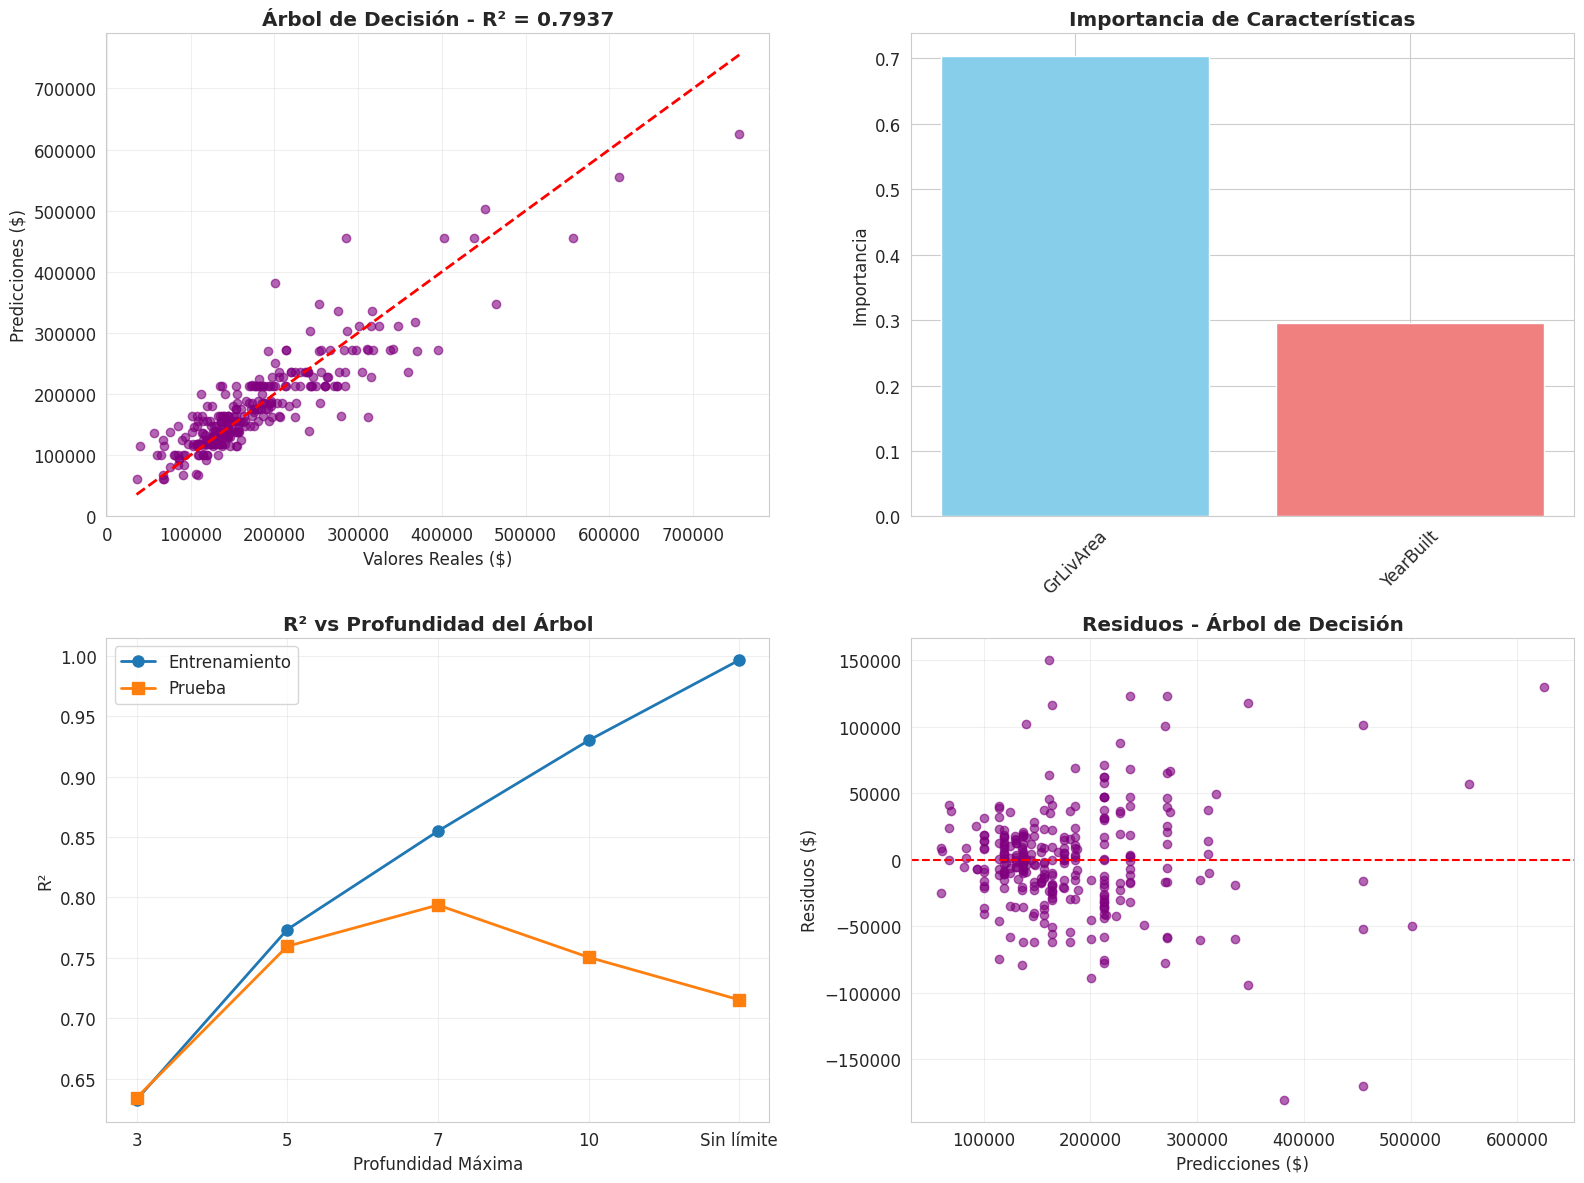


🔍 ANÁLISIS DE OVERFITTING:
Profundidad  R² Train   R² Test    Gap        Estado              
-------------------------------------------------------
3            0.6325     0.6341     -0.0016    🟢 Buen balance      
5            0.7734     0.7596     0.0139     🟢 Buen balance      
7            0.8549     0.7937     0.0612     🟢 Buen balance      
10           0.9299     0.7505     0.1795     🟡 Overfitting leve  
Sin límite   0.9965     0.7153     0.2812     🟡 Overfitting leve  
✅ Análisis de Árbol de Decisión completado


In [9]:
# ============================================================================
# 8. ÁRBOL DE DECISIÓN PARA REGRESIÓN
# ============================================================================

print("\n🌳 8. ÁRBOL DE DECISIÓN PARA REGRESIÓN")
print("="*45)

print("📚 ACERCA DE ÁRBOL DE DECISIÓN PARA REGRESIÓN:")
print("""
🔹 PRINCIPIO:
   • Crea un modelo en forma de árbol que toma decisiones
   • Divide iterativamente el dataset basándose en características
   • Para regresión, predice valores continuos en las hojas

🔹 VENTAJAS:
   • Muy interpretable y fácil de visualizar
   • No requiere estandarización de datos
   • Maneja automáticamente interacciones entre características
   • Funciona con características categóricas y numéricas

🔹 DESVENTAJAS:
   • Propenso al overfitting
   • Inestable (pequeños cambios pueden crear árboles muy diferentes)
   • Puede tener dificultades con relaciones lineales
""")

# Probar diferentes profundidades
max_depths = [3, 5, 7, 10, None]
dt_results = {}

print(f"\n🧪 PROBANDO DIFERENTES PROFUNDIDADES:")

for max_depth in max_depths:
    print(f"   Entrenando Árbol con profundidad máxima: {max_depth}...")
    
    # Entrenar modelo (usar datos originales, no estandarizados)
    dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = dt_model.predict(X_train)
    y_pred_test = dt_model.predict(X_test)
    
    # Métricas
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    dt_results[max_depth] = {
        'model': dt_model,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test
    }
    
    depth_str = str(max_depth) if max_depth is not None else "Sin límite"
    print(f"     • RMSE (prueba): ${rmse_test:,.0f}")
    print(f"     • R² (prueba): {r2_test:.4f}")

# Seleccionar mejor profundidad
best_depth = max(dt_results.keys(), key=lambda d: dt_results[d]['r2_test'])
best_dt = dt_results[best_depth]

depth_str = str(best_depth) if best_depth is not None else "Sin límite"
print(f"\n🏆 MEJOR RESULTADO: profundidad = {depth_str}")
print(f"   ENTRENAMIENTO:")
print(f"   • MSE: {best_dt['mse_train']:,.0f}")
print(f"   • RMSE: ${best_dt['rmse_train']:,.0f}")
print(f"   • MAE: ${best_dt['mae_train']:,.0f}")
print(f"   • R²: {best_dt['r2_train']:.4f}")

print(f"   PRUEBA:")
print(f"   • MSE: {best_dt['mse_test']:,.0f}")
print(f"   • RMSE: ${best_dt['rmse_test']:,.0f}")
print(f"   • MAE: ${best_dt['mae_test']:,.0f}")
print(f"   • R²: {best_dt['r2_test']:.4f}")

# Información del árbol
best_model = best_dt['model']
print(f"\n🌳 INFORMACIÓN DEL ÁRBOL:")
print(f"   • Profundidad real del árbol: {best_model.get_depth()}")
print(f"   • Número de hojas: {best_model.get_n_leaves()}")
print(f"   • Número de nodos: {best_model.tree_.node_count}")

# Importancia de características
feature_importance = best_model.feature_importances_
print(f"\n📊 IMPORTANCIA DE CARACTERÍSTICAS:")
for i, importance in enumerate(feature_importance):
    print(f"   • {features_simple[i]}: {importance:.3f}")

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Predicciones vs Valores Reales
axes[0,0].scatter(y_test, best_dt['y_pred_test'], alpha=0.6, color='purple')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Valores Reales ($)')
axes[0,0].set_ylabel('Predicciones ($)')
axes[0,0].set_title(f'Árbol de Decisión - R² = {best_dt["r2_test"]:.4f}', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Importancia de características
axes[0,1].bar(features_simple, feature_importance, color=['skyblue', 'lightcoral'])
axes[0,1].set_title('Importancia de Características', fontweight='bold')
axes[0,1].set_ylabel('Importancia')
axes[0,1].tick_params(axis='x', rotation=45)

# Comparación de R² por profundidad
depths = list(dt_results.keys())
r2_train_scores = [dt_results[d]['r2_train'] for d in depths]
r2_test_scores = [dt_results[d]['r2_test'] for d in depths]

depth_labels = [str(d) if d is not None else "Sin límite" for d in depths]
x_pos = np.arange(len(depth_labels))

axes[1,0].plot(x_pos, r2_train_scores, 'o-', label='Entrenamiento', linewidth=2, markersize=8)
axes[1,0].plot(x_pos, r2_test_scores, 's-', label='Prueba', linewidth=2, markersize=8)
axes[1,0].set_xlabel('Profundidad Máxima')
axes[1,0].set_ylabel('R²')
axes[1,0].set_title('R² vs Profundidad del Árbol', fontweight='bold')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(depth_labels)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Residuos
residuals_test = y_test - best_dt['y_pred_test']
axes[1,1].scatter(best_dt['y_pred_test'], residuals_test, alpha=0.6, color='purple')
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_xlabel('Predicciones ($)')
axes[1,1].set_ylabel('Residuos ($)')
axes[1,1].set_title('Residuos - Árbol de Decisión', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de overfitting
print(f"\n🔍 ANÁLISIS DE OVERFITTING:")
print(f"{'Profundidad':<12} {'R² Train':<10} {'R² Test':<10} {'Gap':<10} {'Estado':<20}")
print("-" * 55)
for depth, results in dt_results.items():
    depth_str = str(depth) if depth is not None else "Sin límite"
    gap = results['r2_train'] - results['r2_test']
    
    if gap > 0.3:
        status = "🔴 Overfitting severo"
    elif gap > 0.1:
        status = "🟡 Overfitting leve"
    else:
        status = "🟢 Buen balance"
    
    print(f"{depth_str:<12} {results['r2_train']:<10.4f} {results['r2_test']:<10.4f} "
          f"{gap:<10.4f} {status:<20}")

print("✅ Análisis de Árbol de Decisión completado")



🌲 9. RANDOM FOREST PARA REGRESIÓN
📚 ACERCA DE RANDOM FOREST PARA REGRESIÓN:

🔹 PRINCIPIO:
   • Ensemble de múltiples árboles de decisión
   • Cada árbol se entrena con muestra aleatoria de datos y características
   • Predicción final es el promedio de todos los árboles

🔹 VENTAJAS:
   • Reduce overfitting comparado con árbol individual
   • Proporciona importancia de características
   • Robusto ante outliers y ruido
   • Maneja automáticamente valores faltantes
   • Funciona bien sin mucho ajuste de parámetros

🔹 DESVENTAJAS:
   • Menos interpretable que árbol individual
   • Requiere más memoria y computación
   • Puede sobreajustar con datasets muy ruidosos


🧪 PROBANDO DIFERENTES NÚMEROS DE ÁRBOLES:
   Entrenando Random Forest con 10 árboles...
     • RMSE (prueba): $38,863
     • R² (prueba): 0.8031
   Entrenando Random Forest con 50 árboles...
     • RMSE (prueba): $39,412
     • R² (prueba): 0.7975
   Entrenando Random Forest con 100 árboles...
     • RMSE (prueba): $39,328
  

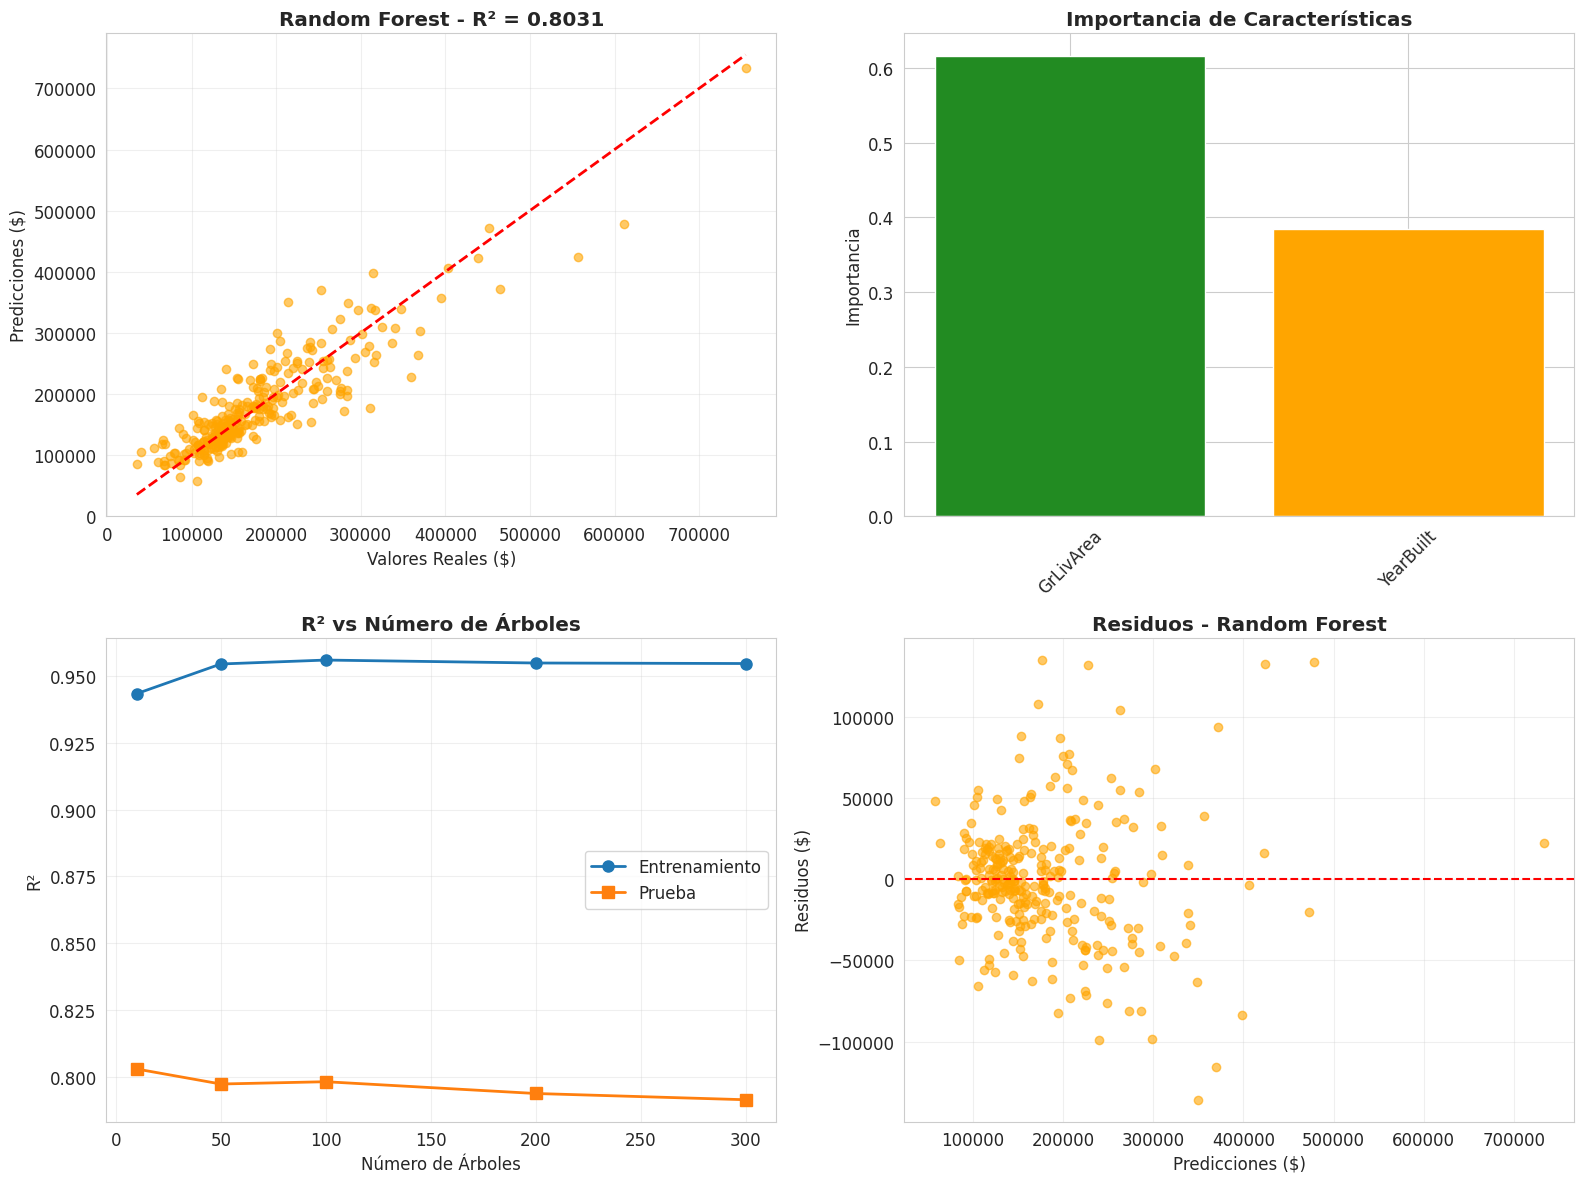


📈 ANÁLISIS DE CONVERGENCIA:
N Árboles  R² Train   R² Test    RMSE Test    Mejora    
-------------------------------------------------------
10         0.9433     0.8031     $38,863      +0.8031
50         0.9544     0.7975     $39,412      -0.0056
100        0.9558     0.7984     $39,328      +0.0009
200        0.9547     0.7940     $39,755      -0.0044
300        0.9545     0.7916     $39,979      -0.0023
✅ Análisis de Random Forest completado


In [10]:
# ============================================================================
# 9. RANDOM FOREST PARA REGRESIÓN
# ============================================================================

print("\n🌲 9. RANDOM FOREST PARA REGRESIÓN")
print("="*40)

print("📚 ACERCA DE RANDOM FOREST PARA REGRESIÓN:")
print("""
🔹 PRINCIPIO:
   • Ensemble de múltiples árboles de decisión
   • Cada árbol se entrena con muestra aleatoria de datos y características
   • Predicción final es el promedio de todos los árboles

🔹 VENTAJAS:
   • Reduce overfitting comparado con árbol individual
   • Proporciona importancia de características
   • Robusto ante outliers y ruido
   • Maneja automáticamente valores faltantes
   • Funciona bien sin mucho ajuste de parámetros

🔹 DESVENTAJAS:
   • Menos interpretable que árbol individual
   • Requiere más memoria y computación
   • Puede sobreajustar con datasets muy ruidosos
""")

# Probar diferentes números de árboles
n_estimators_list = [10, 50, 100, 200, 300]
rf_results = {}

print(f"\n🧪 PROBANDO DIFERENTES NÚMEROS DE ÁRBOLES:")

for n_estimators in n_estimators_list:
    print(f"   Entrenando Random Forest con {n_estimators} árboles...")
    
    # Entrenar modelo (usar datos originales, no estandarizados)
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)
    
    # Métricas
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    rf_results[n_estimators] = {
        'model': rf_model,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test
    }
    
    print(f"     • RMSE (prueba): ${rmse_test:,.0f}")
    print(f"     • R² (prueba): {r2_test:.4f}")

# Seleccionar mejor número de árboles
best_n_estimators = max(rf_results.keys(), key=lambda n: rf_results[n]['r2_test'])
best_rf = rf_results[best_n_estimators]

print(f"\n🏆 MEJOR RESULTADO: {best_n_estimators} árboles")
print(f"   ENTRENAMIENTO:")
print(f"   • MSE: {best_rf['mse_train']:,.0f}")
print(f"   • RMSE: ${best_rf['rmse_train']:,.0f}")
print(f"   • MAE: ${best_rf['mae_train']:,.0f}")
print(f"   • R²: {best_rf['r2_train']:.4f}")

print(f"   PRUEBA:")
print(f"   • MSE: {best_rf['mse_test']:,.0f}")
print(f"   • RMSE: ${best_rf['rmse_test']:,.0f}")
print(f"   • MAE: ${best_rf['mae_test']:,.0f}")
print(f"   • R²: {best_rf['r2_test']:.4f}")

# Importancia de características
best_model = best_rf['model']
feature_importance_rf = best_model.feature_importances_
print(f"\n📊 IMPORTANCIA DE CARACTERÍSTICAS:")
for i, importance in enumerate(feature_importance_rf):
    print(f"   • {features_simple[i]}: {importance:.3f}")

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Predicciones vs Valores Reales
axes[0,0].scatter(y_test, best_rf['y_pred_test'], alpha=0.6, color='orange')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Valores Reales ($)')
axes[0,0].set_ylabel('Predicciones ($)')
axes[0,0].set_title(f'Random Forest - R² = {best_rf["r2_test"]:.4f}', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Importancia de características
axes[0,1].bar(features_simple, feature_importance_rf, color=['forestgreen', 'orange'])
axes[0,1].set_title('Importancia de Características', fontweight='bold')
axes[0,1].set_ylabel('Importancia')
axes[0,1].tick_params(axis='x', rotation=45)

# R² vs Número de árboles
n_trees = list(rf_results.keys())
r2_train_rf = [rf_results[n]['r2_train'] for n in n_trees]
r2_test_rf = [rf_results[n]['r2_test'] for n in n_trees]

axes[1,0].plot(n_trees, r2_train_rf, 'o-', label='Entrenamiento', linewidth=2, markersize=8)
axes[1,0].plot(n_trees, r2_test_rf, 's-', label='Prueba', linewidth=2, markersize=8)
axes[1,0].set_xlabel('Número de Árboles')
axes[1,0].set_ylabel('R²')
axes[1,0].set_title('R² vs Número de Árboles', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Residuos
residuals_test = y_test - best_rf['y_pred_test']
axes[1,1].scatter(best_rf['y_pred_test'], residuals_test, alpha=0.6, color='orange')
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_xlabel('Predicciones ($)')
axes[1,1].set_ylabel('Residuos ($)')
axes[1,1].set_title('Residuos - Random Forest', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de convergencia
print(f"\n📈 ANÁLISIS DE CONVERGENCIA:")
print(f"{'N Árboles':<10} {'R² Train':<10} {'R² Test':<10} {'RMSE Test':<12} {'Mejora':<10}")
print("-" * 55)
prev_r2 = 0
for n_estimators, results in rf_results.items():
    improvement = results['r2_test'] - prev_r2
    print(f"{n_estimators:<10} {results['r2_train']:<10.4f} {results['r2_test']:<10.4f} "
          f"${results['rmse_test']:<11,.0f} {improvement:+.4f}")
    prev_r2 = results['r2_test']

print("✅ Análisis de Random Forest completado")



📊 10. COMPARACIÓN INTEGRAL DE MODELOS
📋 TABLA COMPARATIVA DE RESULTADOS:
Método             Parámetros           RMSE Train   RMSE Test    R² Train   R² Test    MAE Test    
----------------------------------------------------------------------------------------------------
Regresión Lineal   default              $45,909      $49,956      0.6466     0.6746     $32,359     
SVR                kernel=poly          $78,219      $87,666      -0.0258    -0.0020    $59,063     
Árbol de Decisión  max_depth=7          $29,422      $39,781      0.8549     0.7937     $27,641     
Random Forest      n_estimators=10      $18,390      $38,863      0.9433     0.8031     $27,802     

🏆 MEJOR MÉTODO GENERAL: Random Forest
   • R² en prueba: 0.8031
   • RMSE en prueba: $38,863
   • Parámetros: n_estimators=10


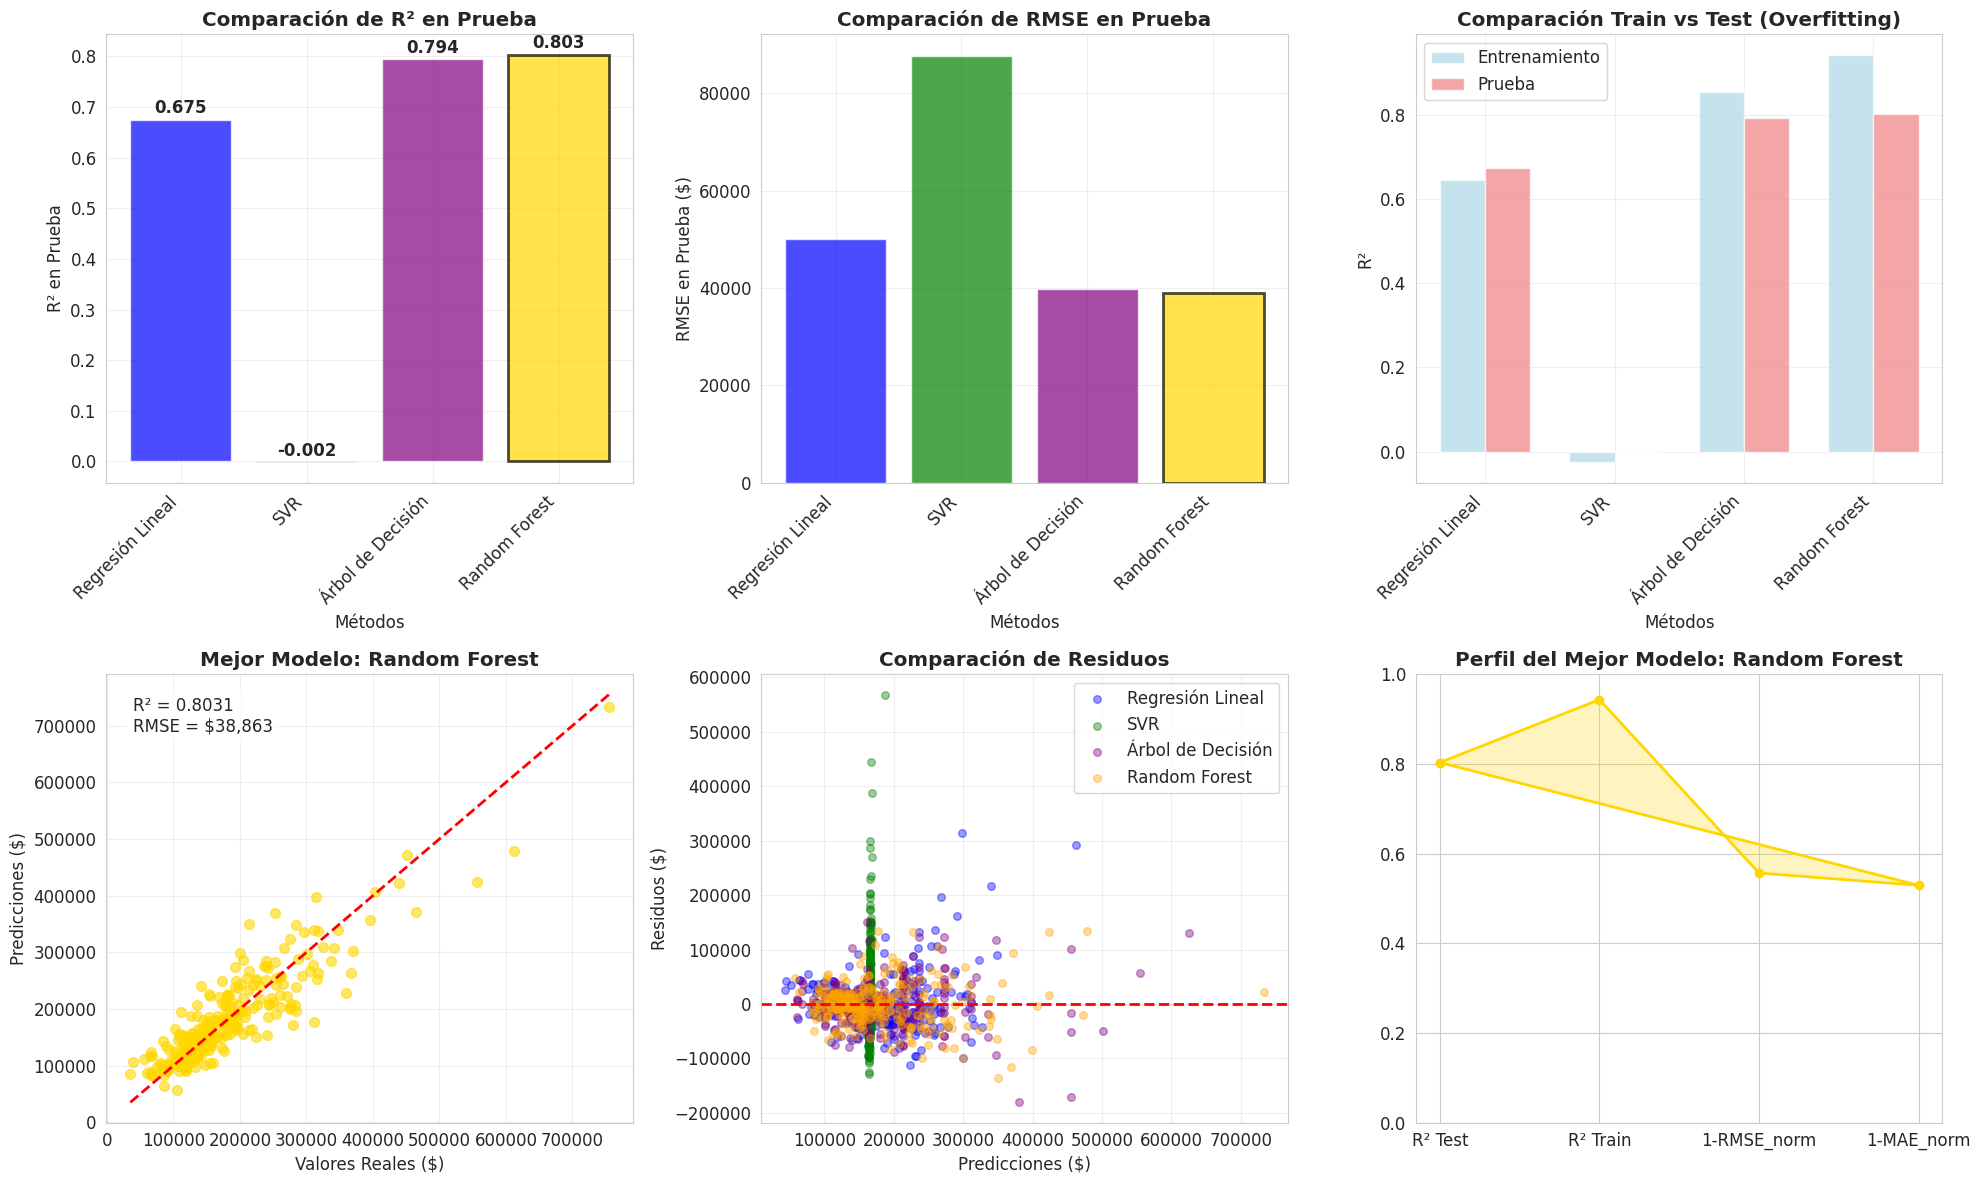


🔍 ANÁLISIS DETALLADO DE RENDIMIENTO:
---------------------------------------------

Regresión Lineal:
   • R² gap (train-test): -0.0280 - 🟢 Buen balance
   • Error promedio: $32,359
   • Precisión: 67.5% de varianza explicada

SVR:
   • R² gap (train-test): -0.0238 - 🟢 Buen balance
   • Error promedio: $59,063
   • Precisión: -0.2% de varianza explicada

Árbol de Decisión:
   • R² gap (train-test): 0.0612 - 🟡 Overfitting leve
   • Error promedio: $27,641
   • Precisión: 79.4% de varianza explicada

Random Forest:
   • R² gap (train-test): 0.1402 - 🟡 Overfitting leve
   • Error promedio: $27,802
   • Precisión: 80.3% de varianza explicada
✅ Comparación integral completada


In [11]:
# ============================================================================
# 10. COMPARACIÓN INTEGRAL DE TODOS LOS MODELOS
# ============================================================================

print("\n📊 10. COMPARACIÓN INTEGRAL DE MODELOS")
print("="*50)

# Recopilar mejores resultados de cada método
models_comparison = {
    'Regresión Lineal': {
        'model': lr_model,
        'params': 'default',
        'mse_train': mse_train_lr,
        'mse_test': mse_test_lr,
        'rmse_train': rmse_train_lr,
        'rmse_test': rmse_test_lr,
        'mae_train': mae_train_lr,
        'mae_test': mae_test_lr,
        'r2_train': r2_train_lr,
        'r2_test': r2_test_lr,
        'y_pred_test': y_pred_test_lr
    },
    'SVR': {
        'model': best_svr['model'],
        'params': f"kernel={best_kernel}",
        'mse_train': best_svr['mse_train'],
        'mse_test': best_svr['mse_test'],
        'rmse_train': best_svr['rmse_train'],
        'rmse_test': best_svr['rmse_test'],
        'mae_train': best_svr['mae_train'],
        'mae_test': best_svr['mae_test'],
        'r2_train': best_svr['r2_train'],
        'r2_test': best_svr['r2_test'],
        'y_pred_test': best_svr['y_pred_test']
    },
    'Árbol de Decisión': {
        'model': best_dt['model'],
        'params': f"max_depth={best_depth}",
        'mse_train': best_dt['mse_train'],
        'mse_test': best_dt['mse_test'],
        'rmse_train': best_dt['rmse_train'],
        'rmse_test': best_dt['rmse_test'],
        'mae_train': best_dt['mae_train'],
        'mae_test': best_dt['mae_test'],
        'r2_train': best_dt['r2_train'],
        'r2_test': best_dt['r2_test'],
        'y_pred_test': best_dt['y_pred_test']
    },
    'Random Forest': {
        'model': best_rf['model'],
        'params': f"n_estimators={best_n_estimators}",
        'mse_train': best_rf['mse_train'],
        'mse_test': best_rf['mse_test'],
        'rmse_train': best_rf['rmse_train'],
        'rmse_test': best_rf['rmse_test'],
        'mae_train': best_rf['mae_train'],
        'mae_test': best_rf['mae_test'],
        'r2_train': best_rf['r2_train'],
        'r2_test': best_rf['r2_test'],
        'y_pred_test': best_rf['y_pred_test']
    }
}

# Crear tabla comparativa
print("📋 TABLA COMPARATIVA DE RESULTADOS:")
print("="*100)
print(f"{'Método':<18} {'Parámetros':<20} {'RMSE Train':<12} {'RMSE Test':<12} {'R² Train':<10} {'R² Test':<10} {'MAE Test':<12}")
print("-" * 100)

for method_name, results in models_comparison.items():
    print(f"{method_name:<18} {results['params']:<20} ${results['rmse_train']:<11,.0f} "
          f"${results['rmse_test']:<11,.0f} {results['r2_train']:<10.4f} "
          f"{results['r2_test']:<10.4f} ${results['mae_test']:<11,.0f}")

# Encontrar el mejor método
best_method = max(models_comparison.keys(), 
                 key=lambda method: models_comparison[method]['r2_test'])

print(f"\n🏆 MEJOR MÉTODO GENERAL: {best_method}")
print(f"   • R² en prueba: {models_comparison[best_method]['r2_test']:.4f}")
print(f"   • RMSE en prueba: ${models_comparison[best_method]['rmse_test']:,.0f}")
print(f"   • Parámetros: {models_comparison[best_method]['params']}")

# Visualización comparativa integral
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Comparación de R² en prueba
methods = list(models_comparison.keys())
r2_test_scores = [models_comparison[m]['r2_test'] for m in methods]
colors = ['blue', 'green', 'purple', 'orange']

bars = axes[0,0].bar(range(len(methods)), r2_test_scores, color=colors, alpha=0.7)
axes[0,0].set_xlabel('Métodos')
axes[0,0].set_ylabel('R² en Prueba')
axes[0,0].set_title('Comparación de R² en Prueba', fontweight='bold')
axes[0,0].set_xticks(range(len(methods)))
axes[0,0].set_xticklabels(methods, rotation=45, ha='right')
axes[0,0].grid(True, alpha=0.3)

# Resaltar el mejor
best_idx = methods.index(best_method)
bars[best_idx].set_color('gold')
bars[best_idx].set_edgecolor('black')
bars[best_idx].set_linewidth(2)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Comparación de RMSE en prueba
rmse_test_scores = [models_comparison[m]['rmse_test'] for m in methods]
bars2 = axes[0,1].bar(range(len(methods)), rmse_test_scores, color=colors, alpha=0.7)
axes[0,1].set_xlabel('Métodos')
axes[0,1].set_ylabel('RMSE en Prueba ($)')
axes[0,1].set_title('Comparación de RMSE en Prueba', fontweight='bold')
axes[0,1].set_xticks(range(len(methods)))
axes[0,1].set_xticklabels(methods, rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3)

# Resaltar el mejor (menor RMSE)
best_rmse_idx = rmse_test_scores.index(min(rmse_test_scores))
bars2[best_rmse_idx].set_color('gold')
bars2[best_rmse_idx].set_edgecolor('black')
bars2[best_rmse_idx].set_linewidth(2)

# 3. Análisis de overfitting
train_r2 = [models_comparison[m]['r2_train'] for m in methods]
test_r2 = [models_comparison[m]['r2_test'] for m in methods]
overfitting_gap = [train - test for train, test in zip(train_r2, test_r2)]

x_pos = np.arange(len(methods))
width = 0.35

bars3 = axes[0,2].bar(x_pos - width/2, train_r2, width, label='Entrenamiento', 
                     color='lightblue', alpha=0.7)
bars4 = axes[0,2].bar(x_pos + width/2, test_r2, width, label='Prueba', 
                     color='lightcoral', alpha=0.7)

axes[0,2].set_xlabel('Métodos')
axes[0,2].set_ylabel('R²')
axes[0,2].set_title('Comparación Train vs Test (Overfitting)', fontweight='bold')
axes[0,2].set_xticks(x_pos)
axes[0,2].set_xticklabels(methods, rotation=45, ha='right')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Scatter plot del mejor modelo
best_predictions = models_comparison[best_method]['y_pred_test']
axes[1,0].scatter(y_test, best_predictions, alpha=0.6, color='gold', s=50)
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Valores Reales ($)')
axes[1,0].set_ylabel('Predicciones ($)')
axes[1,0].set_title(f'Mejor Modelo: {best_method}', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Agregar estadísticas en el gráfico
r2_best = models_comparison[best_method]['r2_test']
rmse_best = models_comparison[best_method]['rmse_test']
axes[1,0].text(0.05, 0.95, f'R² = {r2_best:.4f}\nRMSE = ${rmse_best:,.0f}', 
              transform=axes[1,0].transAxes, fontsize=12, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 5. Comparación de residuos
for i, (method, results) in enumerate(models_comparison.items()):
    residuals = y_test - results['y_pred_test']
    axes[1,1].scatter(results['y_pred_test'], residuals, alpha=0.4, 
                     color=colors[i], label=method, s=30)

axes[1,1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1,1].set_xlabel('Predicciones ($)')
axes[1,1].set_ylabel('Residuos ($)')
axes[1,1].set_title('Comparación de Residuos', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Gráfico de radar del mejor modelo
from math import pi

metrics_labels = ['R² Test', 'R² Train', '1-RMSE_norm', '1-MAE_norm']
# Normalizar métricas para el radar (todas entre 0 y 1)
max_rmse = max([models_comparison[m]['rmse_test'] for m in methods])
max_mae = max([models_comparison[m]['mae_test'] for m in methods])

radar_values = [
    models_comparison[best_method]['r2_test'],
    models_comparison[best_method]['r2_train'],
    1 - (models_comparison[best_method]['rmse_test'] / max_rmse),
    1 - (models_comparison[best_method]['mae_test'] / max_mae)
]

angles = [n / float(len(metrics_labels)) * 2 * pi for n in range(len(metrics_labels))]
angles += angles[:1]
radar_values += radar_values[:1]

axes[1,2].plot(angles, radar_values, 'o-', linewidth=2, label=best_method, color='gold')
axes[1,2].fill(angles, radar_values, alpha=0.25, color='gold')
axes[1,2].set_xticks(angles[:-1])
axes[1,2].set_xticklabels(metrics_labels)
axes[1,2].set_ylim(0, 1)
axes[1,2].set_title(f'Perfil del Mejor Modelo: {best_method}', fontweight='bold')
axes[1,2].grid(True)

plt.tight_layout()
plt.show()

# Análisis detallado de rendimiento
print(f"\n🔍 ANÁLISIS DETALLADO DE RENDIMIENTO:")
print("-" * 45)

for method_name, results in models_comparison.items():
    gap = results['r2_train'] - results['r2_test']
    
    if gap > 0.15:
        overfitting_status = "🔴 Overfitting significativo"
    elif gap > 0.05:
        overfitting_status = "🟡 Overfitting leve"
    else:
        overfitting_status = "🟢 Buen balance"
    
    print(f"\n{method_name}:")
    print(f"   • R² gap (train-test): {gap:.4f} - {overfitting_status}")
    print(f"   • Error promedio: ${results['mae_test']:,.0f}")
    print(f"   • Precisión: {results['r2_test']:.1%} de varianza explicada")

print("✅ Comparación integral completada")


In [12]:
# ============================================================================
# 11. ANÁLISIS AVANZADO CON MÁS CARACTERÍSTICAS
# ============================================================================

print("\n🚀 11. ANÁLISIS AVANZADO CON MÁS CARACTERÍSTICAS")
print("="*55)

print("🎯 OBJETIVO: Mejorar el rendimiento agregando más características relevantes")
print("   Seleccionaremos características numéricas con alta correlación con el precio")

# Seleccionar solo características numéricas para evitar problemas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if target_variable in numeric_columns:
    numeric_columns.remove(target_variable)

# Remover columnas con muchos valores faltantes o que sean IDs
exclude_columns = ['Id']  # Agregar más columnas a excluir si es necesario
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

print(f"📊 Características numéricas disponibles: {len(numeric_columns)}")

# Calcular correlaciones con la variable objetivo
correlations_with_target = df[numeric_columns + [target_variable]].corr()[target_variable].abs().sort_values(ascending=False)

# Seleccionar top características (excluyendo la variable objetivo)
correlations_features = correlations_with_target.drop(target_variable)
top_features = correlations_features.head(10).index.tolist()

print(f"\n🔗 Top 10 características por correlación absoluta:")
for i, feature in enumerate(top_features, 1):
    corr = correlations_features[feature]
    print(f"   {i:2d}. {feature:<20}: {corr:.3f}")

# Crear dataset con más características
X_advanced = df[top_features].copy()
y_advanced = df[target_variable].copy()

print(f"\n📊 DATASET AVANZADO:")
print(f"   • Características seleccionadas: {len(top_features)}")
print(f"   • Forma de X: {X_advanced.shape}")

# Limpiar valores faltantes
print(f"\n🧹 Limpieza de valores faltantes:")
missing_before = X_advanced.isnull().sum().sum()
print(f"   • Valores faltantes antes: {missing_before}")

# Estrategias de limpieza por tipo de característica
for col in X_advanced.columns:
    if X_advanced[col].isnull().any():
        missing_count = X_advanced[col].isnull().sum()
        missing_pct = (missing_count / len(X_advanced)) * 100
        print(f"   • {col}: {missing_count} faltantes ({missing_pct:.1f}%)")
        
        # Imputar con la mediana para características numéricas
        X_advanced[col].fillna(X_advanced[col].median(), inplace=True)

missing_after = X_advanced.isnull().sum().sum()
print(f"   • Valores faltantes después: {missing_after}")

# División de datos para modelo avanzado
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_advanced, y_advanced, test_size=0.2, random_state=42
)

# Estandarización
scaler_adv = StandardScaler()
X_train_adv_scaled = scaler_adv.fit_transform(X_train_adv)
X_test_adv_scaled = scaler_adv.transform(X_test_adv)

print(f"\n📊 División para modelo avanzado:")
print(f"   • Entrenamiento: {X_train_adv.shape[0]} muestras")
print(f"   • Prueba: {X_test_adv.shape[0]} muestras")

# Probar modelos con más características
print(f"\n🧪 ENTRENANDO MODELOS CON {len(top_features)} CARACTERÍSTICAS:")

advanced_models = {}

# Random Forest (mejor modelo anterior)
print("   Entrenando Random Forest...")
rf_adv = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_adv.fit(X_train_adv, y_train_adv)
y_pred_rf_adv = rf_adv.predict(X_test_adv)

advanced_models['Random Forest'] = {
    'model': rf_adv,
    'y_pred': y_pred_rf_adv,
    'r2': r2_score(y_test_adv, y_pred_rf_adv),
    'rmse': np.sqrt(mean_squared_error(y_test_adv, y_pred_rf_adv)),
    'mae': mean_absolute_error(y_test_adv, y_pred_rf_adv)
}

# SVR con kernel RBF
print("   Entrenando SVR...")
svr_adv = SVR(kernel='rbf', C=100, epsilon


SyntaxError: unexpected EOF while parsing (384332155.py, line 95)